# 05/05 - Pair Programming Estadística III - Lidia y Tatiana

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# EJERCICIO 1 y 2
**Interpretación de los resultados.**
**Ahora interpreta los resultados obtenidos de los diferentes estadísticos estudiados haciendo incapié en aspectos interesantes de tus datos y explica lo mejor posible la naturaleza de los mismos.**

In [2]:
df= pd.read_csv("./googleplaystore.csv",index_col = 0)
pd.options.display.max_columns=None
df.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
#df= df[df["Category"].isin(["DATING", "HEALTH_AND_FITNESS" , "FINANCE"])]

In [4]:
df= df.dropna() #eliminamos los nan para facilitar calculos

- **Tabla de contingencia**

    Resultado comentado: Analiza la relación existente entre los tipos de Apps (pago o gratuitas) y los generos de App. Por ejemplo: Existen dentro de Google App Store 334 Apps de categoria acción que son gratuistas frente a 24 de pago.

In [5]:
type_genres_data_crosstab = pd.crosstab(df['Type'], 
                            df['Genres']) 
type_genres_data_crosstab.T

Type,Free,Paid
Genres,,
Action,334,24
Action;Action & Adventure,14,3
Adventure,61,12
Adventure;Action & Adventure,11,2
Adventure;Brain Games,0,1
...,...,...
Video Players & Editors,154,4
Video Players & Editors;Creativity,2,0
Video Players & Editors;Music & Video,3,0


- Coeficiente de correlacón de las variables numéricas del dataset.

        Resultado comentado: Los valores diagonales de la matriz, tienen valor 1 esto significa que la correlación entre la variable y ella misma es total. Mientras que, el valor del coeficiente de correlación entre raiting y reviews es una correlación positiva moderada(0,068) , es decir solo existe una relación lineal moderada entre las variables. Una relación positiva significa que al aumentar una variable, la otra también aumenta. En nuestro caso debido a que la correlación es moderada, no podemos determinar que  un aumento del raiting, ocasione un aumento de reviews.Su valor se puede interpretar así:+ 1 Correlación positiva completa, +0,8 Fuerte correlación positiva,+ 0,6 – Correlación positiva moderada,0 sin correlación alguna,- 0,6 Correlación negativa moderada,- 0,8 Fuerte correlación negativa,- 1 Correlación negativa completa
        

In [6]:
#Para poder hacer el anáisis sobre estas dos columnas " Rating" y "Reviews", debemos convertir "Reviews" a int64, por que en su  origen es object
df['Reviews'] = df['Reviews'].astype('int64')

In [7]:
matriz_correlacion= np.corrcoef(df["Rating"],df["Reviews"])
pd.DataFrame(matriz_correlacion)

,0,1
0,1.000000,0.068133
1,0.068133,1.000000


<AxesSubplot:>

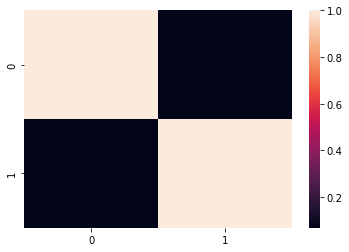

In [8]:
sns.heatmap(matriz_correlacion) # Al tener solo 2 variables a relacionar, el resultado es escueto. 

- **Sesgos de alguna de las variables numéricas del dataset.**

        Resultado comentado: Cálculamos skewnss para comprobar el valor de la media del sesgo , si ers positiva o negativa. El resultado ha sido negrativo, quiere decir que estará "sesgado a la izquierda", La "cola" izquierda del histograma será más larga que la derecha, decir, el centro de masas estará concentrado en la parte derecha del mismo. 

In [9]:
df["Rating"].unique() #Comprobamos los valores nulos de "Rating" para estar seguros que no hay valores nulos.

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 4. , 4.8, 4.9, 3.6,
       3.7, 3.2, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [10]:
skewness= skew(df["Rating"])
skewness # esta es la media del sesgo 

-1.8498381055614301

<AxesSubplot:xlabel='Rating', ylabel='Count'>

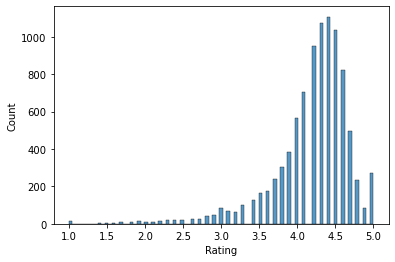

In [11]:
df_rating= df.dropna()
sns.histplot(df_rating.reset_index(),x="Rating")

- **Intervalo de confianza de algunas de las variables numéricas del dataset**

        Resultado comentado: 

        Sobre Reviews;se determina que el intervalo de confianza se encuentra entre(450654.58803875453, 578098.8224313309), en éste rango es donde está la media de los valores de "Reviews"  con un 95% de probabilidad.
        
        Sobre Rating; se determina que el intervalo de confianza se encuentra entre(4.181397732567428, 4.202277481107796), en éste rango es donde está la media de los valores de "Rating"  con un 95% de probabilidad.

In [12]:
import scipy.stats as st
data = df['Reviews']
data_rating = df['Rating']
print("Resultado del intervalo de confianza de Reviews:",st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)))
print("Resultado del intervalo de confianza de Rating:",st.t.interval(alpha=0.95, df=len(data_rating)-1, loc=np.mean(data_rating), scale=st.sem(data_rating)))

Resultado del intervalo de confianza de Reviews: (450654.58803875453, 578098.8224313309)
Resultado del intervalo de confianza de Rating: (4.181397732567428, 4.202277481107796)
